In [1]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using Plots.PlotMeasures
using ProgressBars, JuMP, Gurobi
const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer
function mon(array)
    result = Float64[]
    last = array[1]
    for elt in array
      new_last = minimum([elt, last])
      push!(result, new_last)
      last = new_last
    end
    return result
end

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-01
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-01


mon (generic function with 1 method)

In [5]:
ThermalGen = ConvexHullPricing.Utilitaries.ThermalGen(
    MinRunCapacity = [6],
    MaxRunCapacity = [16],
    RampUp = [5],
    RampDown = [5],
    StartUp = [6],
    ShutDown = [6],
    UpTime = [1],
    DownTime = [1],
    NoLoadConsumption = [10],
    MarginalCost = [53],
    FixedCost = [30],
)
instance = ConvexHullPricing.Utilitaries.Instance(
    LostLoad = 3000,
    Load = [6, 11, 16, 11],
    ThermalGen = ThermalGen
)
X0 = UT.LP_Relaxation(instance)

4-element Vector{Float64}:
 51.0
 55.0
 54.25
 53.625

In [24]:
sum([899.,900,559,160,263,820,614,302])/8

564.625

In [20]:
UT.smooth_stochastic_oracle(instance, X0, 1e-8, 1)

(2368.87501068, [6.0, 11.0, 16.0, 11.0], [1])

In [23]:
x = 0:.6:60
y = 0:.6:60
z = Float64[]
for argx in x
  for argy in y
    push!(z, UT.exact_oracle(instance, [argx, argy])[1])
  end
end

In [25]:
argmax(reshape(z, (101,101)))

CartesianIndex(18, 68)

In [32]:
bundle = OPT.tBPLM(instance, X0, 3., 0.1)[2]
x_bundle = [point[1] for point in bundle]
y_bundle = [point[2] for point in bundle]

smoothbundle = OPT.tSmoothBPLM(instance, X0, 3., 0.1, 1e-5)[2]
x_smoothbundle = [point[1] for point in smoothbundle]
y_smoothbundle = [point[2] for point in smoothbundle]
@info "done"

┌ Info: done
└ @ Main c:\Users\Sofiane\Documents\ConvexHullPricing.jl\notebooks\Checkup.ipynb:8


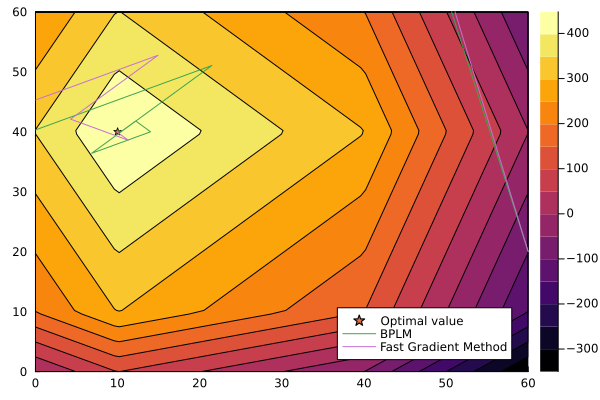

In [33]:
contourf(x, y, z,
    xlims=(0,60),
    ylims=(0,60),)
scatter!([10], [40], label = "Optimal value", markershape=:star)
plot!(y_bundle, x_bundle, label = "BPLM")
plot!(y_smoothbundle, x_smoothbundle, label = "Fast Gradient Method")
# savefig("example.pdf")

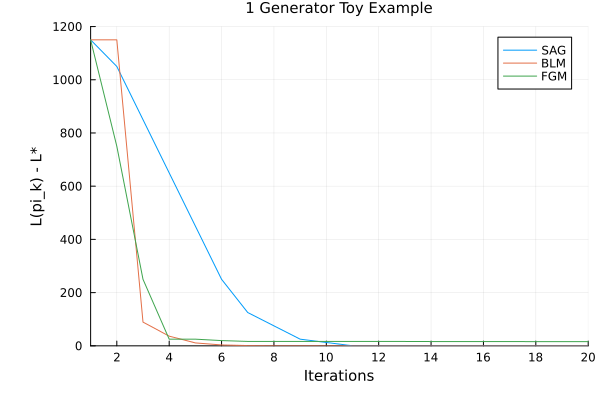

In [107]:
plot(
    title = "1 Generator Toy Example",
    xlabel = "Iterations",
    ylabel = "L(pi_k) - L*",
    xlims=(1,20),
    ylims=(0,1200),
    xticks=0:2:20,
    xscale=:identity,
    titlefontsize=10,
    labelfontsize=10,
    size=(600,400),
    bottom_margin = 15px,
    left_margin = 30px
)
plot!(mon(350 .- SAG), label = "SAG")
plot!(mon(350 .- BLM), label = "BLM")
plot!(mon(350 .- FGM), label = "FGM")